In [1]:
%matplotlib inline
import glob
import h5py
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import skopi as sk

import time
import numpy as np
import pandas as pd
from tqdm import tqdm

from IPython.display import clear_output
from sklearn.decomposition import PCA, IncrementalPCA

import os
import sys
sys.path.append('../src/')
from embedding import batch_PCA, run_PCA

In [2]:
n_images = 2544
batch_size = 48
dim = 128

data = np.load('/scratch/fpoitevi/anass_internship/datasets/cryoem/sim/randomrot1D_nodisorder_nonoise_128x128/cryo_sim_128x128.npy').reshape(n_images, dim, dim)
labels = pd.read_csv('/scratch/fpoitevi/anass_internship/datasets/cryoem/sim/randomrot1D_nodisorder_nonoise_128x128/cryo_sim_labels_128x128.csv')

defoc = labels.focus
theta = labels.theta

# Direct PCA

In [3]:
n_comp = 48

In [4]:
t1 = time.time()

pca = PCA(n_components=n_comp)
pca.fit(data.reshape(n_images, dim**2))

t2 = time.time()
print(f'PCA fitted in {t2 - t1}s')

PCA fitted in 7.559000492095947s


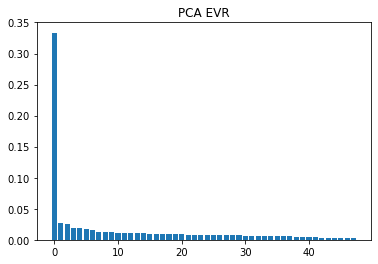

In [5]:
fig = plt.figure(figsize=(6, 4))
plt.bar(np.arange(n_comp), pca.explained_variance_ratio_)
plt.title('PCA EVR')
plt.show()

In [6]:
fig.savefig('../images/pca_evr_128.png')

In [7]:
resized = pca.transform(data.reshape(n_images, dim**2))

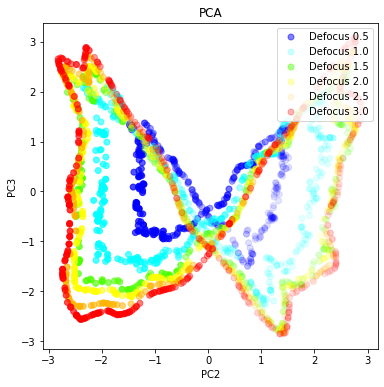

In [11]:
def angle_color(angle, color) :
    r, g, b = color
    alpha = 0.1 + (1 - np.abs(angle / 180))**2 * 0.7
    return r, g, b, alpha

fig = plt.figure(figsize=(6, 6))

defocus = 0.5 * np.arange(1, 7)
base_colors = [(0., 0., 1.), (0., 1., 1.), (0.3, 1., 0.), (1., 1., 0), (1., 0.7, 0.), (1., 0., 0.)]

for i in range(len(defocus)) :
    d = defocus[i]
    index = (defoc == d)
    col = [angle_color(angle, base_colors[i]) for angle in theta[index]]
    plt.scatter(resized[index, 2], resized[index, 3], c=col, label=f'Defocus {d}')

plt.legend(loc='upper right')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA')

plt.show()

In [38]:
fig.savefig('../images/pca_comp_128.png')

# Incremental PCA

In [32]:
n_comp = 48

In [39]:
t1 = time.time()

ipca = IncrementalPCA(n_components=n_comp, batch_size=batch_size)
ipca.fit(data.reshape(n_images, dim**2))

t2 = time.time()
print(f'iPCA fitted in {t2 - t1}s')

/opt/anaconda/envs/ana/lib/python3.7/site-packages/sklearn/decomposition/_incremental_pca.py:316: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/opt/anaconda/envs/ana/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


iPCA fitted in 20.809446573257446s


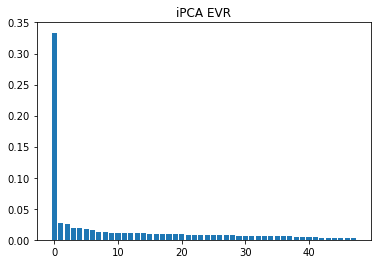

In [42]:
fig = plt.figure(figsize=(6, 4))
plt.bar(np.arange(n_comp), ipca.explained_variance_ratio_)
plt.title('iPCA EVR')
plt.show()

In [43]:
fig.savefig('../images/ipca_evr_128.png')

In [46]:
iresized = ipca.transform(data.reshape(n_images, dim**2))

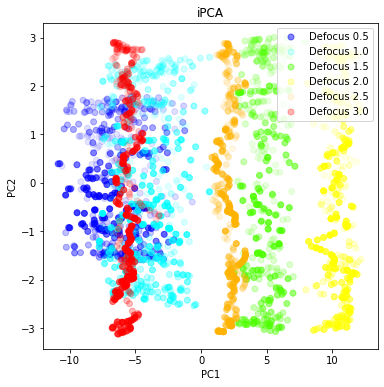

In [47]:
fig = plt.figure(figsize=(6, 6))

defocus = 0.5 * np.arange(1, 7)
base_colors = [(0., 0., 1.), (0., 1., 1.), (0.3, 1., 0.), (1., 1., 0), (1., 0.7, 0.), (1., 0., 0.)]

for i in range(len(defocus)) :
    d = defocus[i]
    index = (defoc == d)
    col = [angle_color(angle, base_colors[i]) for angle in theta[index]]
    plt.scatter(iresized[index, 0], iresized[index, 1], c=col, label=f'Defocus {d}')

plt.legend(loc='upper right')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('iPCA')

plt.show()

In [38]:
fig.savefig('../images/ipca_comp_128.png')